In [1]:
import pandas as pd #pandas library is used for working with datasets.It has function for analyzign cleaning exploring and manipulating data 
import numpy as np #numpy as multidimensional array 


In [2]:
import matplotlib.pyplot as plt # Matplotlib allows user to create numerous and diverse plot types
import seaborn as sns #Seaborn is python data visualization library based on matplotlib
import plotly.express as px #plotly express is the easy to use, high level interface to Plotly which operates on a variety of types of data and produces easy to style figures 
from matplotlib import style # is used to create plot styles 
import re # regular expressions if needed 
import nltk # natural language toolkit used for natural language processing 
import random 
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize #is used to word tokenization using nltk library  
from nltk.stem import PorterStemmer #is used to step the words
from nltk.corpus import stopwords #import stop words( a set of words for pausing)
stopwords = set(stopwords.words('english'))
from wordcloud import WordCloud ,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer #used in vectorization 
from sklearn.model_selection import train_test_split #training the model 
from nltk.stem import WordNetLemmatizer # Lematization is the process of grouping together different inflected forms of a word so they can be analysed as a single item 



In [4]:
df= pd.read_csv(r"D:\Mojor1\CSV_Files\Final_Data - Sheet1.csv",usecols= ['Genre','MovieName','Movie_ID','User_ID','Reviews','Ratings'])


In [5]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews Ratings  Movie_ID  
0  The Shawshank Redemption holds the Number 1 sp...      10         1  
1  However delightful as it is The Shawshank Rede...      10         1  
2  However delightful as it is The Shawshank Rede...      10         1  
3  "The Shawshank Redemption" is a cinematic gem ...      10         1  
4  "Hope is a good thing probably best of all & g...      10         1

In [6]:
df.shape

(4005, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Genre      3980 non-null   object 
 1   MovieName  3980 non-null   object 
 2   User_ID    3980 non-null   float64
 3   Reviews    3979 non-null   object 
 4   Ratings    3980 non-null   object 
 5   Movie_ID   4005 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 187.9+ KB


In [8]:
df.isnull().mean()*100

Genre        0.624220
MovieName    0.624220
User_ID      0.624220
Reviews      0.649189
Ratings      0.624220
Movie_ID     0.000000
dtype: float64

In [9]:
df['Reviews'].dropna(inplace = True)

In [10]:
df.isnull().mean()*100

Genre        0.624220
MovieName    0.624220
User_ID      0.624220
Reviews      0.649189
Ratings      0.624220
Movie_ID     0.000000
dtype: float64

In [11]:
df.shape

(4005, 6)

In [12]:
len(df)-len(df.drop_duplicates())
#there are 0 duplicate data 

24

In [13]:
#used for droping the non numeric values present in the 
df =df[pd.to_numeric(df['Ratings'],errors='coerce').notnull()] 

In [14]:
df.isnull().mean()*100

Genre        0.000000
MovieName    0.000000
User_ID      0.000000
Reviews      0.025517
Ratings      0.000000
Movie_ID     0.000000
dtype: float64

In [15]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews Ratings  Movie_ID  
0  The Shawshank Redemption holds the Number 1 sp...      10         1  
1  However delightful as it is The Shawshank Rede...      10         1  
2  However delightful as it is The Shawshank Rede...      10         1  
3  "The Shawshank Redemption" is a cinematic gem ...      10         1  
4  "Hope is a good thing probably best of all & g...      10         1

Bar plot(Numerical- Categorical)

In [16]:
df['Ratings'] = pd.to_numeric(df['Ratings'])

<Axes: xlabel='Ratings', ylabel='Genre'>

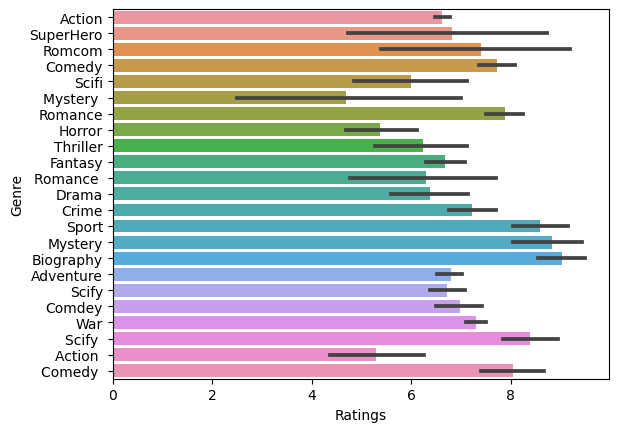

In [17]:
sns.barplot(x=df.Ratings,y = df.Genre)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3919 entries, 0 to 3979
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Genre      3919 non-null   object 
 1   MovieName  3919 non-null   object 
 2   User_ID    3919 non-null   float64
 3   Reviews    3918 non-null   object 
 4   Ratings    3919 non-null   int64  
 5   Movie_ID   3919 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 214.3+ KB


In [19]:
man_value = df['Ratings'].max()
print(man_value)

10


In [20]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  
0  The Shawshank Redemption holds the Number 1 sp...       10         1  
1  However delightful as it is The Shawshank Rede...       10         1  
2  However delightful as it is The Shawshank Rede...       10         1  
3  "The Shawshank Redemption" is a cinematic gem ...       10         1  
4  "Hope is a good thing probably best of all & g...       10         1

In [21]:
check = df[df['Genre'] == 'Romance']#['Ratings']

In [22]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 61 to 3929
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Genre      160 non-null    object 
 1   MovieName  160 non-null    object 
 2   User_ID    160 non-null    float64
 3   Reviews    160 non-null    object 
 4   Ratings    160 non-null    int64  
 5   Movie_ID   160 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 8.8+ KB


These two heatmaps will help us understand the distribution of the ratings per genre 


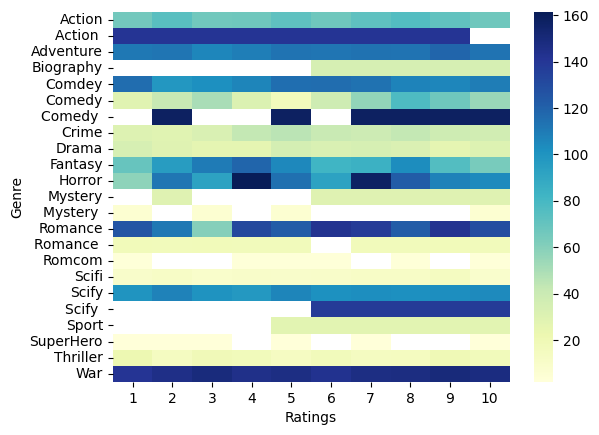

In [23]:
movie_matrix = df.pivot_table(index = 'Genre',columns="Ratings",values = 'Movie_ID')
sns.heatmap(movie_matrix,cmap="YlGnBu", fmt="0.0f")
plt.show()

<Axes: xlabel='Ratings', ylabel='Genre'>

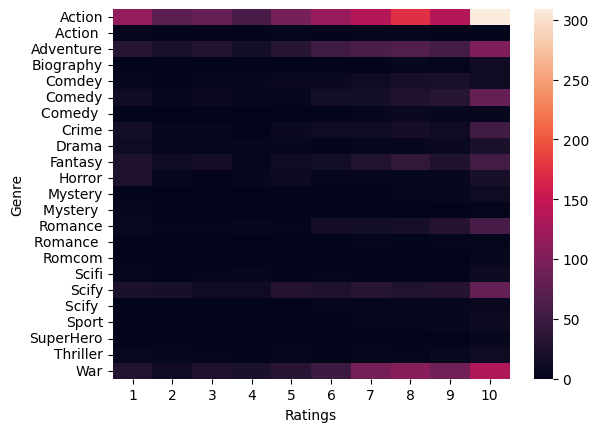

In [24]:
sns.heatmap(pd.crosstab(df['Genre'],df['Ratings']))

In [25]:
df.dropna(subset=['Reviews'],inplace = True)

In [26]:
df.isnull().mean()*100

Genre        0.0
MovieName    0.0
User_ID      0.0
Reviews      0.0
Ratings      0.0
Movie_ID     0.0
dtype: float64

In [27]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  
0  The Shawshank Redemption holds the Number 1 sp...       10         1  
1  However delightful as it is The Shawshank Rede...       10         1  
2  However delightful as it is The Shawshank Rede...       10         1  
3  "The Shawshank Redemption" is a cinematic gem ...       10         1  
4  "Hope is a good thing probably best of all & g...       10         1

In [28]:
from nltk.corpus import stopwords # imports stop works( a set of words used to pausing)
stop_words = set(stopwords.words('english')) #

In [29]:
#this function and this block of code returns the sentiment of the user and the amount of positive and negative words per review 
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x: str) -> list:
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
     return lemmatize
preprocess_tag = [text_prep(i) for i in df['Reviews']]
df["preprocess_txt"] = preprocess_tag
df['total_len'] = df['preprocess_txt'].map(lambda x: len(x))
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()
num_pos = df['preprocess_txt'].map(lambda x: len([i for i in x if i in pos_words]))
df['pos_count'] = num_pos
num_neg = df['preprocess_txt'].map(lambda x: len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg
df['sentiment'] = round((df['pos_count'] - df['neg_count']) / df['total_len'], 2)
df.head()


Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all & g...       10         1   

                                      preprocess_txt  total_len  pos_count  \
0  [shawshank, redemption, hold, number, spot, to...        274         45   
1  [however, delightful, shawshank, redemption, a...        303         45   
2  [however, delightful, shawshank, redemption, a...        303         45   
3  [shawshank, redemption, cinematic, gem, transc...        229         31   
4  [hope, good, thing, probably, best, good, thin...        160         18   

   neg_count  sentiment  
0         12       0.12  
1         23       0.07  
2         23       0.07  
3         10       0.09  
4         18       0.00

In [30]:
df = df.drop(['pos_count','neg_count'],axis = 1)

In [31]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all & g...       10         1   

                                      preprocess_txt  total_len  sentiment  
0  [shawshank, redemption, hold, number, spot, to...        274       0.12  
1  [however, delightful, shawshank, redemption, a...        303       0.07  
2  [however, delightful, shawshank, redemption, a...        303       0.07  
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09  
4  [hope, good, thing, probably, best, good, thin...        160       0.00

Rating Distribution

Text(0.5, 1.0, 'Ratings Distribution')

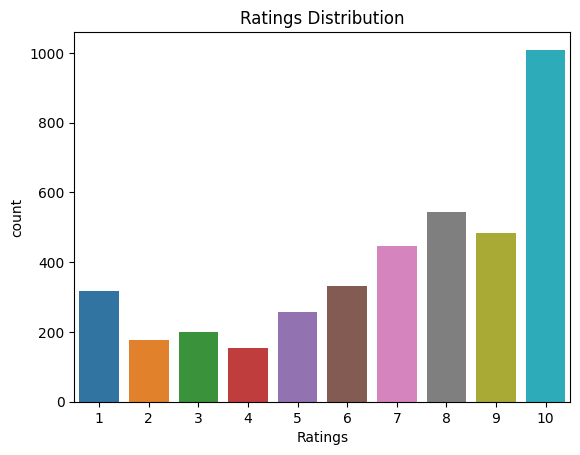

In [32]:
sns.countplot(x= 'Ratings',data = df)
plt.title("Ratings Distribution")

C:\Users\mohit\AppData\Local\Temp\ipykernel_10144\1749631374.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ratings'],hist = True)


<Axes: xlabel='Ratings', ylabel='Density'>

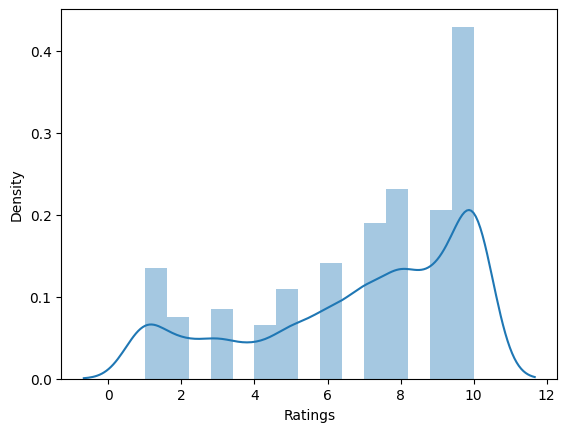

In [33]:
sns.distplot(df['Ratings'],hist = True)

Text(0.5, 1.0, 'Sentiment Distribution')

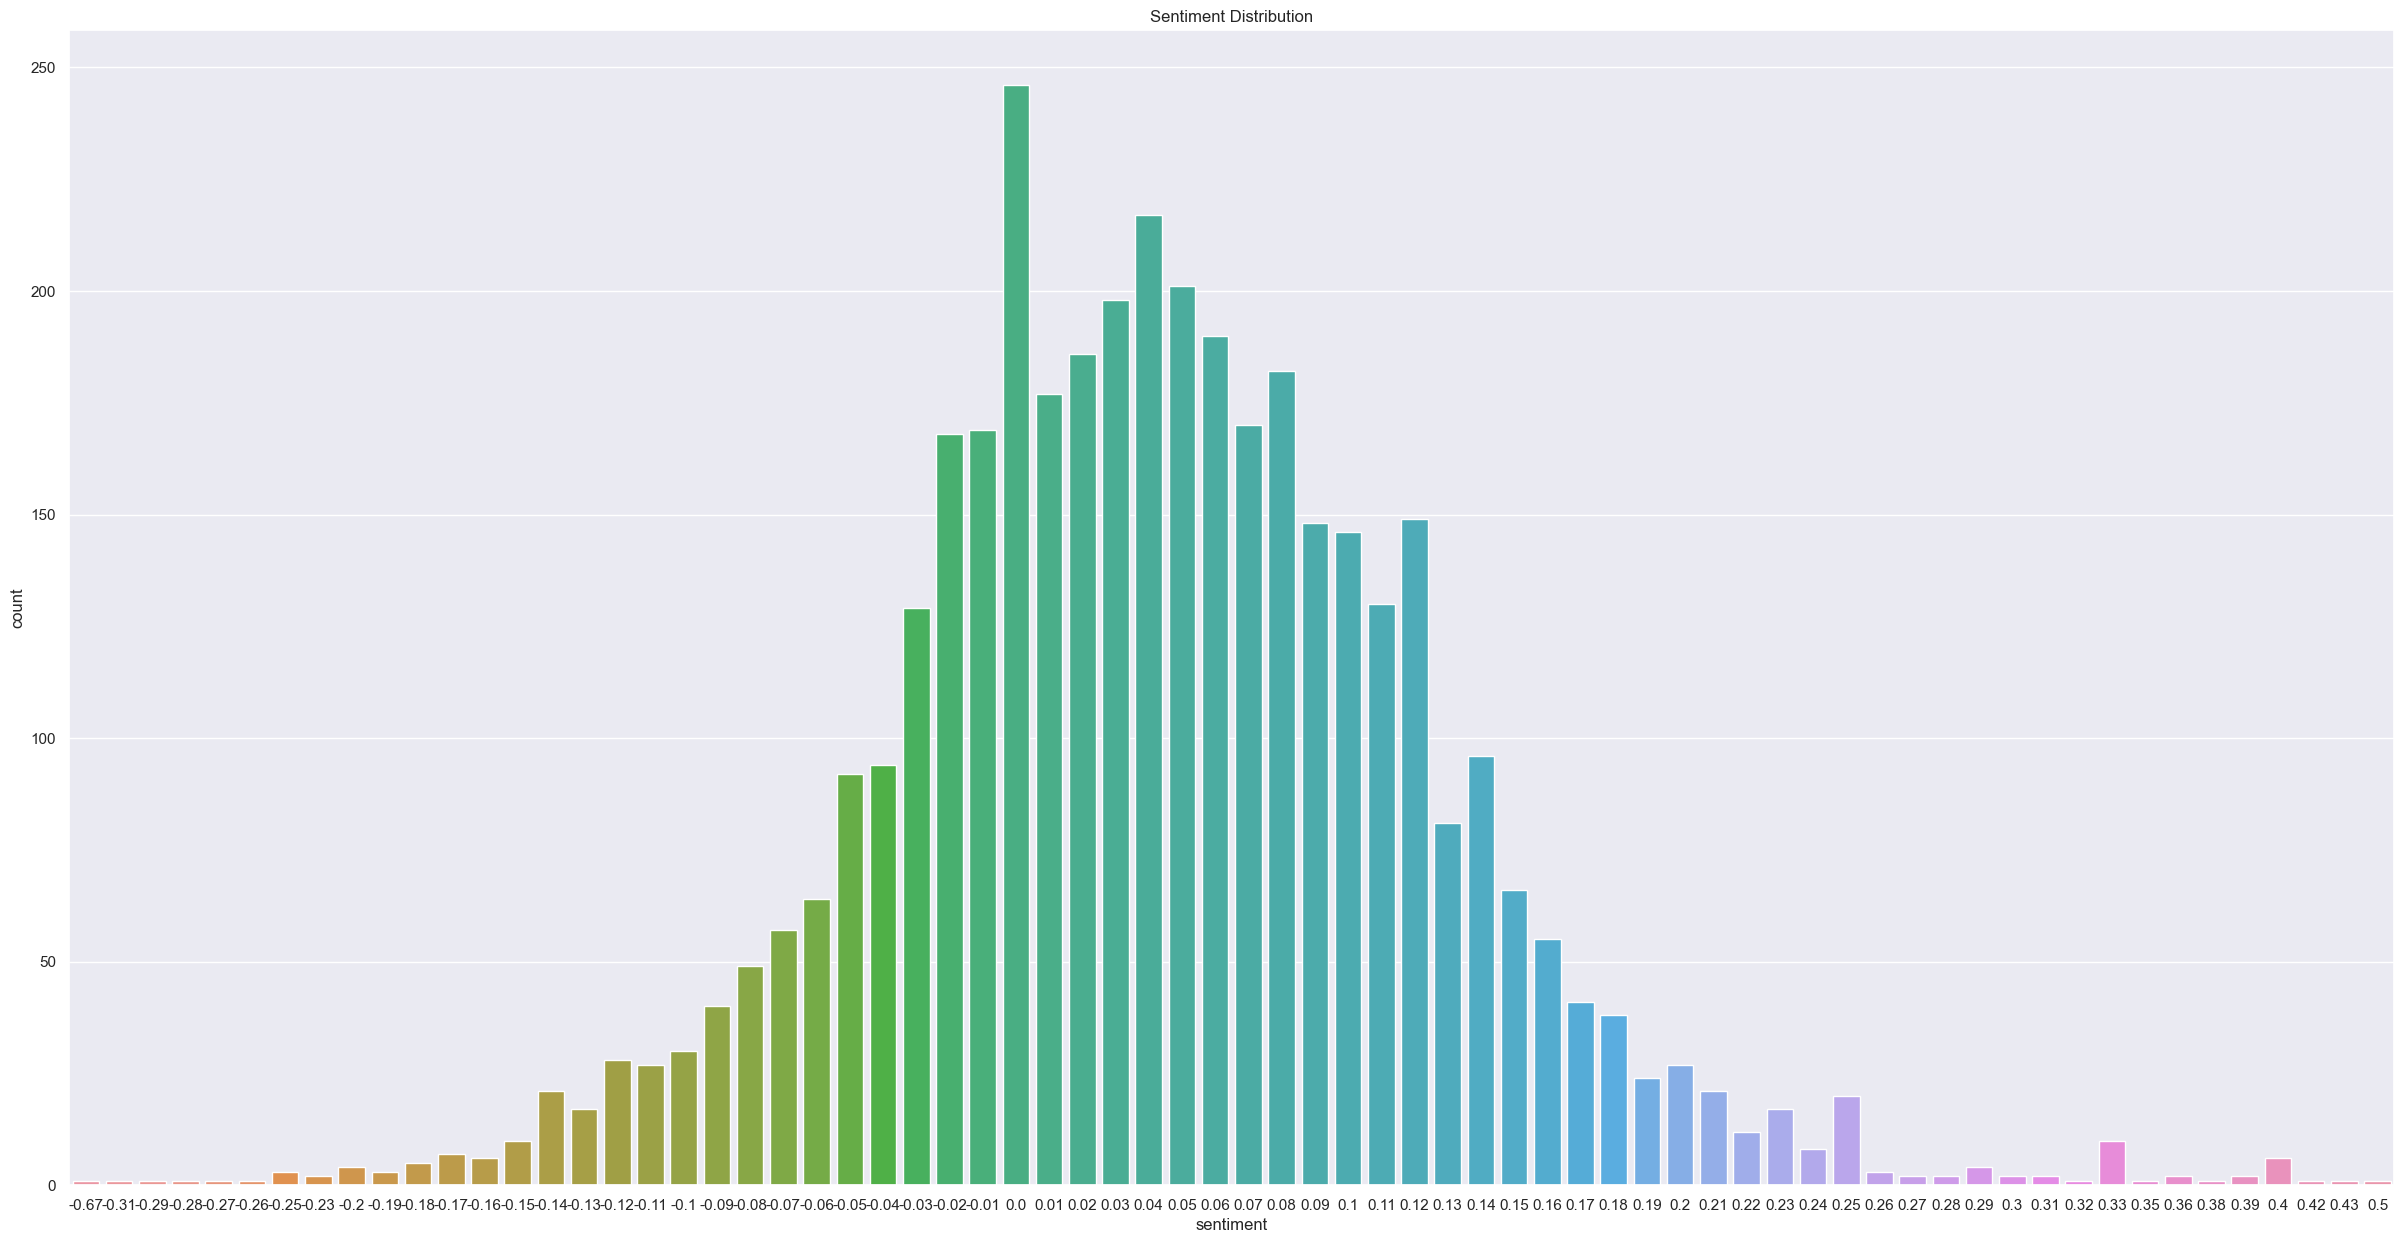

In [34]:
# sentiments of users distributed across the range
sns.set(rc = {'figure.figsize':(30,15)})
sns.countplot(x = 'sentiment',data = df)
plt.title("Sentiment Distribution")

In [35]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all & g...       10         1   

                                      preprocess_txt  total_len  sentiment  
0  [shawshank, redemption, hold, number, spot, to...        274       0.12  
1  [however, delightful, shawshank, redemption, a...        303       0.07  
2  [however, delightful, shawshank, redemption, a...        303       0.07  
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09  
4  [hope, good, thing, probably, best, good, thin...        160       0.00

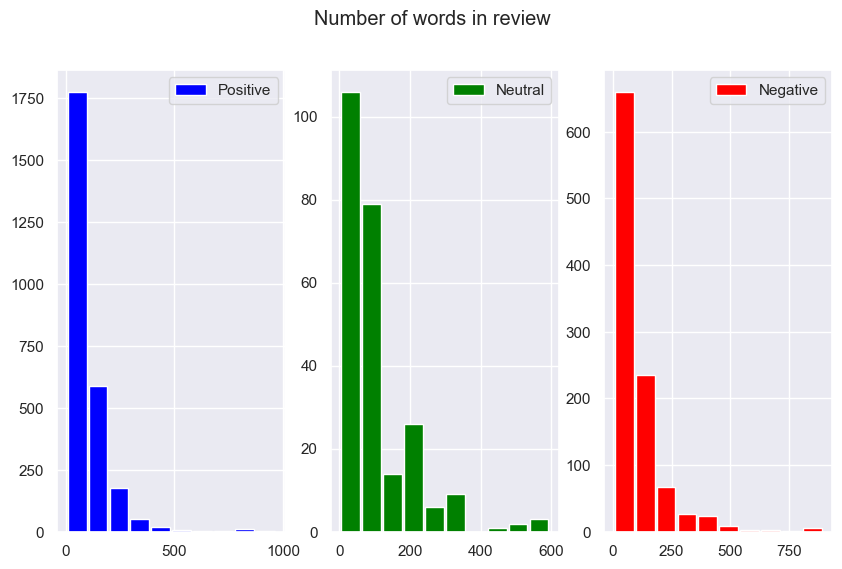

In [36]:
fig, ax = plt.subplots(1,3,figsize=(10,6))
ax[0].hist(df[df['sentiment'] > 0]['total_len'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 0]['total_len'], label='Neutral', color='green', rwidth=0.9);
ax[1].legend(loc='upper right');
ax[2].hist(df[df['sentiment'] <0 ]['total_len'], label='Negative', color='red', rwidth=0.9);
ax[2].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [37]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all & g...       10         1   

                                      preprocess_txt  total_len  sentiment  
0  [shawshank, redemption, hold, number, spot, to...        274       0.12  
1  [however, delightful, shawshank, redemption, a...        303       0.07  
2  [however, delightful, shawshank, redemption, a...        303       0.07  
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09  
4  [hope, good, thing, probably, best, good, thin...        160       0.00

In [38]:
def categorize_movie_rating(sentiment):
    if sentiment >0:
        return "positive"; #3 means positve rating
    elif sentiment == 0:
        return "neutral"; #neutral
    else:
        return "negative"; #not liked rating
     
df['Sentiment_Ratings'] = df['sentiment'].apply(categorize_movie_rating)
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all & g...       10         1   

                                      preprocess_txt  total_len  sentiment  \
0  [shawshank, redemption, hold, number, spot, to...        274       0.12   
1  [however, delightful, shawshank, redemption, a...        303       0.07   
2  [however, delightful, shawshank, redemption, a...        303       0.07   
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09   
4  [hope, good, thing, probably, best, good, thin...        160       0.00   

  Sentiment_Ratings  
0          positive  
1          positive  
2          positive  
3          positive  
4           neutral

For postive reviews

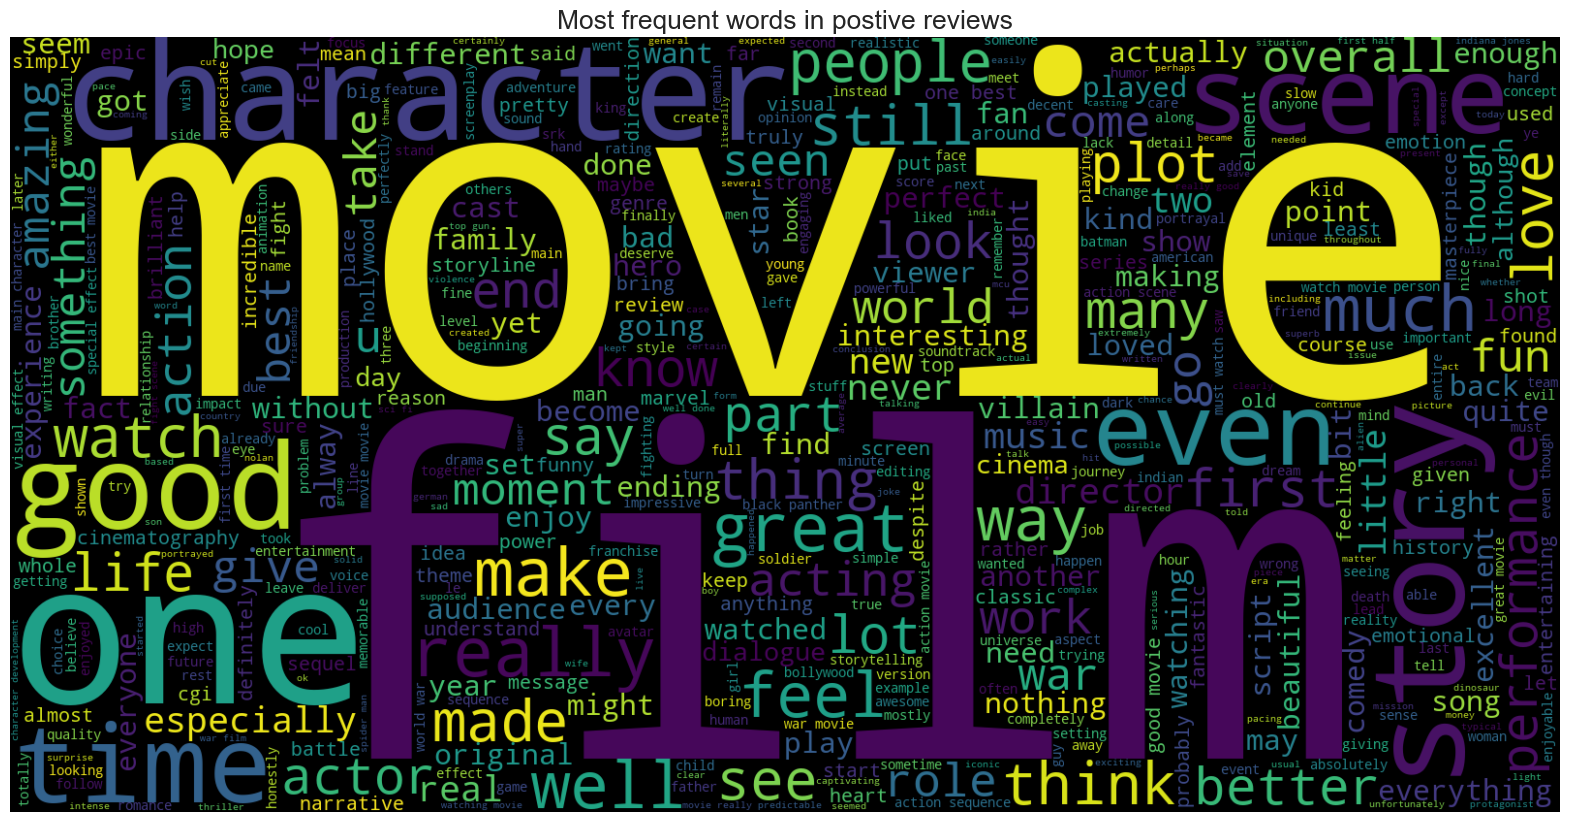

In [39]:
#visual representation of most frequent words in positive reviews
pos_reviews = df[df.sentiment >0]
text =' '.join([str(word) for review in pos_reviews['preprocess_txt']for word in review])

plt.figure(figsize = (20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500,width=1600,height = 800).generate(text)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in postive reviews',fontsize = 19)
plt.show()

In [40]:
stemmed_token = [word for review in pos_reviews['preprocess_txt']for word in review]

#compute frequency distribution
freq_dist = nltk.FreqDist(stemmed_token)

#print most common words
print(freq_dist.most_common(10))

[('movie', 6798), ('film', 5283), ('like', 2272), ('one', 2185), ('character', 2001), ('good', 1939), ('story', 1866), ('time', 1700), ('scene', 1471), ('well', 1383)]


In [41]:
pos_words = pd.DataFrame(freq_dist.most_common(15))
pos_words.columns = ['words','count']

pos_words.head()

words  count
0      movie   6798
1       film   5283
2       like   2272
3        one   2185
4  character   2001

Plotting a bar graph for the positive words in the reviews 


In [42]:
px.bar(pos_words,x = 'count',y ='words',title = "Common words in positive reviews")

for neutral reviews 

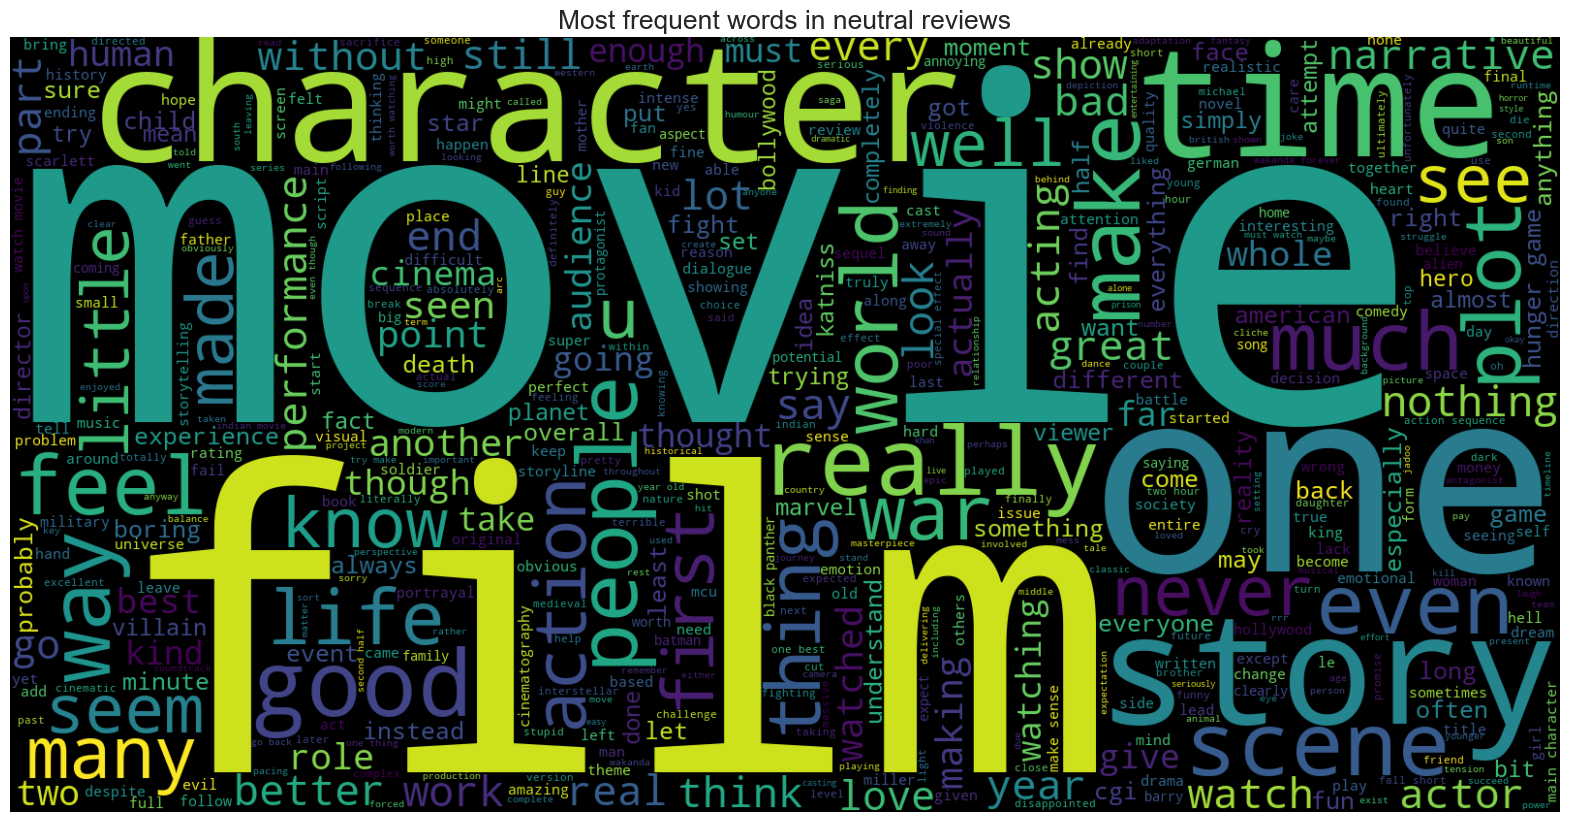

In [43]:
neu_reviews = df[df.sentiment ==0 ]
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in neu_reviews['preprocess_txt'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral reviews', fontsize = 19)
plt.show()

In [44]:
stemmed_token = [word for review in neu_reviews['preprocess_txt']for word in review]

#compute frequency distribution 
freq_dist = nltk.FreqDist(stemmed_token)

# print the most common words 
print(freq_dist.most_common(10))

[('movie', 520), ('film', 391), ('like', 202), ('one', 185), ('character', 173), ('time', 155), ('story', 155), ('would', 135), ('make', 119), ('scene', 114)]


In [45]:
neu_words = pd.DataFrame(freq_dist.most_common(15))
neu_words.columns =['word','count']
neu_words[:10]

word  count
0      movie    520
1       film    391
2       like    202
3        one    185
4  character    173
5       time    155
6      story    155
7      would    135
8       make    119
9      scene    114

In [46]:
px.bar(neu_words , x='count',y='word',title = 'Common words in Neutral Reviews')

For negative reviews

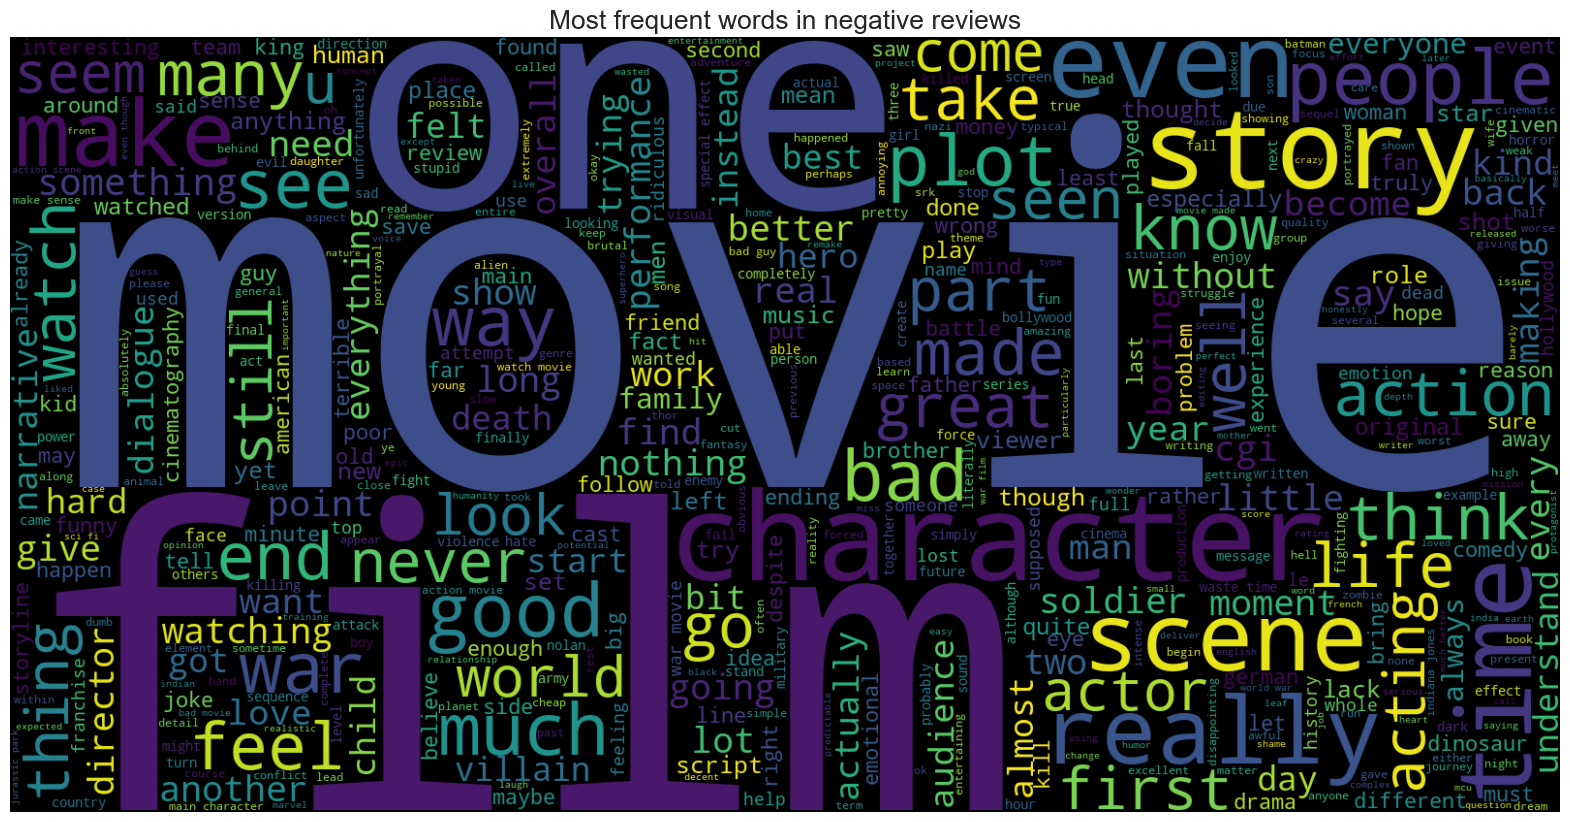

In [47]:
neg_reviews = df[df.sentiment<0]
#visual representation of most frequent words in positive reviews 
text = ' '.join([str(word) for review in neg_reviews['preprocess_txt'] for word in review])

plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [48]:
stemmed_tokens = [word for review in neg_reviews['preprocess_txt'] for word in review]

#compute frequency distribution 
freq_dist = nltk.FreqDist(stemmed_tokens)

#print most common words 
print(freq_dist.most_common(10))

[('movie', 2378), ('film', 1688), ('one', 858), ('character', 806), ('like', 776), ('war', 638), ('time', 616), ('story', 614), ('even', 519), ('scene', 503)]


In [49]:
neg_words = pd.DataFrame(freq_dist.most_common(15))
neg_words.columns = ['words','count']
neg_words[:10]

words  count
0      movie   2378
1       film   1688
2        one    858
3  character    806
4       like    776
5        war    638
6       time    616
7      story    614
8       even    519
9      scene    503

In [50]:
#ploting a bar graph for the positive words in the reviews
px.bar(neg_words, x='count', y='words', title='Common words in Negative reviews')

In [51]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all & g...       10         1   

                                      preprocess_txt  total_len  sentiment  \
0  [shawshank, redemption, hold, number, spot, to...        274       0.12   
1  [however, delightful, shawshank, redemption, a...        303       0.07   
2  [however, delightful, shawshank, redemption, a...        303       0.07   
3  [shawshank, redemption, cinematic, gem, transc...        229       0.09   
4  [hope, good, thing, probably, best, good, thin...        160       0.00   

  Sentiment_Ratings  
0          positive  
1          positive  
2          positive  
3          positive  
4           neutral

In [52]:
df = df.drop(['preprocess_txt','total_len'],axis = 1)

In [53]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number 1 sp...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all & g...       10         1   

   sentiment Sentiment_Ratings  
0       0.12          positive  
1       0.07          positive  
2       0.07          positive  
3       0.09          positive  
4       0.00           neutral

In [54]:
df['Sentiment_Ratings'].value_counts().reset_index()

Sentiment_Ratings  count
0          positive   2641
1          negative   1031
2           neutral    246

In [55]:
#remvoing numbers tags and symbols 
def remove_numbers(text):
    return re.sub('[0-9]+', '', text)
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)
def remove_symbols(text):
    return re.sub("[!@#$%^&*(){}£\/'']",'',text)

In [56]:
df['Reviews'] = df['Reviews'].apply(lambda x: remove_numbers(x))
df['Reviews'] = df['Reviews'].apply(lambda x: remove_html_tags(x))
df['Reviews'] = df['Reviews'].apply(lambda x: remove_symbols(x))


In [57]:
print(f"{df['Reviews'][2000]} -> {df['Sentiment_Ratings'][2000]}")

Obviously picking up the franchise f
 After the unexpected deaths of Chadwick Bozeman was going to be a big challenge. The opening sequence was brilliant and did justice to his memory. The story itself started out strong and had great potential. Then things devolved with a bizarre plot and an obvious ripoff of Avatar. The bad guys dont seem that bad, and the climactic final scene wasnt that climactic. It was actually quite anticlimactic. Plot holes were everywhere the eye could see as well. Overall, it was good but could have been so much better. In retrospect, they should have ended this series with the death of Boseman. There really can only be one Black Panther. -> negative


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import en_core_web_sm
import spacy

What is spacy?

spaCy is designed specifically for production use and helps you build applications that process and undertsand large volumes of text. It can be used to build information extraction or natural language understanding systems or to pre process text for deep learning. It provides advanced capabilities to conduct natural langauge preprocessing(NLP) on large volumes of texts at high speed. It hepls you build models and production applications that can underpim document analysis, chatbot capanilities and all other forms of text analysis.

What is en_core_web_sm?

en_core_web_sm is a small English pipeline trained on written web text (blog,newn comments)that includes vocabulary syntax and entities, It is an Enligh language multi task Convolutionsla Neural Network CNN. Assigns context-spcific token vectors, POS tags , dependency parse and named entitites.

In [59]:
nlp = en_core_web_sm.load()
nlp

In [60]:
txt = df['Reviews'][3979]
txt

'First off everybody, judge the movie for what it is and not what it isnt Its not a deep dive look into the Benghazi debacle from a sociopolitical standpoint. Its not particularly interested in trying to present a detailed overview of the Libyan situation or which political party was responsible for what. Yet even most of the critics reviews couldnt seem to face that fact. Its not even as nuanced as Black Hawk Down; but what it IS is the story of the military operatives who took action that night. It is from their point of view almost exclusively and tries to recreate the hell they went through. And it does this surprisingly well Unlike Bays Transformers garbage it is not over edited to the point of ridiculousness, nor is it dumb and lame. It is an excellent action film full of intense sequences and believable characters. And thats all it intends to be'

In [61]:
doc = nlp(txt)
print(doc)

First off everybody, judge the movie for what it is and not what it isnt Its not a deep dive look into the Benghazi debacle from a sociopolitical standpoint. Its not particularly interested in trying to present a detailed overview of the Libyan situation or which political party was responsible for what. Yet even most of the critics reviews couldnt seem to face that fact. Its not even as nuanced as Black Hawk Down; but what it IS is the story of the military operatives who took action that night. It is from their point of view almost exclusively and tries to recreate the hell they went through. And it does this surprisingly well Unlike Bays Transformers garbage it is not over edited to the point of ridiculousness, nor is it dumb and lame. It is an excellent action film full of intense sequences and believable characters. And thats all it intends to be


In [62]:
for token in doc:
    print(token)

First
off
everybody
,
judge
the
movie
for
what
it
is
and
not
what
it
is
nt
Its
not
a
deep
dive
look
into
the
Benghazi
debacle
from
a
sociopolitical
standpoint
.
Its
not
particularly
interested
in
trying
to
present
a
detailed
overview
of
the
Libyan
situation
or
which
political
party
was
responsible
for
what
.
Yet
even
most
of
the
critics
reviews
could
nt
seem
to
face
that
fact
.
Its
not
even
as
nuanced
as
Black
Hawk
Down
;
but
what
it
IS
is
the
story
of
the
military
operatives
who
took
action
that
night
.
It
is
from
their
point
of
view
almost
exclusively
and
tries
to
recreate
the
hell
they
went
through
.
And
it
does
this
surprisingly
well
Unlike
Bays
Transformers
garbage
it
is
not
over
edited
to
the
point
of
ridiculousness
,
nor
is
it
dumb
and
lame
.
It
is
an
excellent
action
film
full
of
intense
sequences
and
believable
characters
.
And
that
s
all
it
intends
to
be


In [63]:
for token in doc:
    print(f"Word: {token} | -> {token.lemma_}")

Word: First | -> first
Word: off | -> off
Word: everybody | -> everybody
Word: , | -> ,
Word: judge | -> judge
Word: the | -> the
Word: movie | -> movie
Word: for | -> for
Word: what | -> what
Word: it | -> it
Word: is | -> be
Word: and | -> and
Word: not | -> not
Word: what | -> what
Word: it | -> it
Word: is | -> be
Word: nt | -> not
Word: Its | -> its
Word: not | -> not
Word: a | -> a
Word: deep | -> deep
Word: dive | -> dive
Word: look | -> look
Word: into | -> into
Word: the | -> the
Word: Benghazi | -> Benghazi
Word: debacle | -> debacle
Word: from | -> from
Word: a | -> a
Word: sociopolitical | -> sociopolitical
Word: standpoint | -> standpoint
Word: . | -> .
Word: Its | -> its
Word: not | -> not
Word: particularly | -> particularly
Word: interested | -> interested
Word: in | -> in
Word: trying | -> try
Word: to | -> to
Word: present | -> present
Word: a | -> a
Word: detailed | -> detailed
Word: overview | -> overview
Word: of | -> of
Word: the | -> the
Word: Libyan | -> libyan


In [64]:
#creating a function to pass each review one by one 
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [65]:
print(txt)
print()
process_txt = preprocess(txt)
print(process_txt)

First off everybody, judge the movie for what it is and not what it isnt Its not a deep dive look into the Benghazi debacle from a sociopolitical standpoint. Its not particularly interested in trying to present a detailed overview of the Libyan situation or which political party was responsible for what. Yet even most of the critics reviews couldnt seem to face that fact. Its not even as nuanced as Black Hawk Down; but what it IS is the story of the military operatives who took action that night. It is from their point of view almost exclusively and tries to recreate the hell they went through. And it does this surprisingly well Unlike Bays Transformers garbage it is not over edited to the point of ridiculousness, nor is it dumb and lame. It is an excellent action film full of intense sequences and believable characters. And thats all it intends to be



everybody judge movie not deep dive look Benghazi debacle sociopolitical standpoint particularly interested try present detailed overview libyan situation political party responsible critic review not face fact nuance Black Hawk story military operative take action night point view exclusively try recreate hell go surprisingly unlike Bays Transformers garbage edit point ridiculousness dumb lame excellent action film intense sequence believable character s intend


In [66]:
df['preprocessed_review'] = df['Reviews'].apply(preprocess)

In [67]:
df.head(15)

Genre                 MovieName  User_ID  \
0      Action  The Shawshank Redemption    100.0   
1      Action  The Shawshank Redemption    101.0   
2      Action  The Shawshank Redemption    102.0   
3      Action  The Shawshank Redemption    103.0   
4      Action  The Shawshank Redemption    104.0   
5   SuperHero            The Dark Night    105.0   
6   SuperHero            The Dark Night    106.0   
7   SuperHero            The Dark Night    107.0   
8   SuperHero            The Dark Night    108.0   
9   SuperHero            The Dark Night    109.0   
10  SuperHero            The Dark Night    110.0   
11  SuperHero            The Dark Night    111.0   
12  SuperHero            The Dark Night    112.0   
13  SuperHero            The Dark Night    113.0   
14  SuperHero            The Dark Night    114.0   

                                              Reviews  Ratings  Movie_ID  \
0   The Shawshank Redemption holds the Number  spo...       10         1   
1   However delightful as it is The Shawshank Rede...       10         1   
2   However delightful as it is The Shawshank Rede...       10         1   
3   "The Shawshank Redemption" is a cinematic gem ...       10         1   
4   "Hope is a good thing probably best of all  go...       10         1   
5   Confidently directed, dark, brooding, and pack...       10         2   
6   Dark, yes, complex, ambitious. Christopher Nol...       10         2   
7   It is just what you want for the best movie. G...       10         2   
8   I couldnt believe "The Dark knight" could live...       10         2   
9   This movie is a work of art. The finest sequel...       10         2   
10  Its hard to find what is wrong with a movie th...        7         2   
11  I just rented this from Netflix and forced mys...        7         2   
12  Another example of an over-hyped movie, but no...        5         2   
13  I gave this film a one just to pull down the o...        3         2   
14  Heath Ledger was great in his role as a Joker ...        2         2   

    sentiment Sentiment_Ratings  \
0        0.12          positive   
1        0.07          positive   
2        0.07          positive   
3        0.09          positive   
4        0.00           neutral   
5        0.03          positive   
6        0.02          positive   
7        0.10          positive   
8        0.16          positive   
9        0.17          positive   
10      -0.04          negative   
11      -0.06          negative   
12       0.13          positive   
13       0.06          positive   
14      -0.03          negative   

                                  preprocessed_review  
0   Shawshank Redemption hold number   spot Top- E...  
1   delightful Shawshank Redemption allegory state...  
2   delightful Shawshank Redemption allegory state...  
3   Shawshank Redemption cinematic gem transcend b...  
4   Hope good thing probably good   good thing die...  
5   confidently direct dark brooding pack impressi...  
6   Dark yes complex ambitious Christopher Nolan c...  
7   want good movie great story great act thrillin...  
8   not believe Dark knight live hype s big surpri...  
9   movie work art fine sequel not think movie lik...  
10  hard find wrong movie craft let start say Dark...  
11  rent Netflix force watch till end dreadful bor...  
12  example hype movie extreme piece junk regard g...  
13  give film pull overall score film not deserve ...  
14  Heath Ledger great role Joker doubt early depa...

In [68]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sentiment_Ratings'] = label.fit_transform(df['Sentiment_Ratings'])
df.head(15)

Genre                 MovieName  User_ID  \
0      Action  The Shawshank Redemption    100.0   
1      Action  The Shawshank Redemption    101.0   
2      Action  The Shawshank Redemption    102.0   
3      Action  The Shawshank Redemption    103.0   
4      Action  The Shawshank Redemption    104.0   
5   SuperHero            The Dark Night    105.0   
6   SuperHero            The Dark Night    106.0   
7   SuperHero            The Dark Night    107.0   
8   SuperHero            The Dark Night    108.0   
9   SuperHero            The Dark Night    109.0   
10  SuperHero            The Dark Night    110.0   
11  SuperHero            The Dark Night    111.0   
12  SuperHero            The Dark Night    112.0   
13  SuperHero            The Dark Night    113.0   
14  SuperHero            The Dark Night    114.0   

                                              Reviews  Ratings  Movie_ID  \
0   The Shawshank Redemption holds the Number  spo...       10         1   
1   However delightful as it is The Shawshank Rede...       10         1   
2   However delightful as it is The Shawshank Rede...       10         1   
3   "The Shawshank Redemption" is a cinematic gem ...       10         1   
4   "Hope is a good thing probably best of all  go...       10         1   
5   Confidently directed, dark, brooding, and pack...       10         2   
6   Dark, yes, complex, ambitious. Christopher Nol...       10         2   
7   It is just what you want for the best movie. G...       10         2   
8   I couldnt believe "The Dark knight" could live...       10         2   
9   This movie is a work of art. The finest sequel...       10         2   
10  Its hard to find what is wrong with a movie th...        7         2   
11  I just rented this from Netflix and forced mys...        7         2   
12  Another example of an over-hyped movie, but no...        5         2   
13  I gave this film a one just to pull down the o...        3         2   
14  Heath Ledger was great in his role as a Joker ...        2         2   

    sentiment  Sentiment_Ratings  \
0        0.12                  2   
1        0.07                  2   
2        0.07                  2   
3        0.09                  2   
4        0.00                  1   
5        0.03                  2   
6        0.02                  2   
7        0.10                  2   
8        0.16                  2   
9        0.17                  2   
10      -0.04                  0   
11      -0.06                  0   
12       0.13                  2   
13       0.06                  2   
14      -0.03                  0   

                                  preprocessed_review  
0   Shawshank Redemption hold number   spot Top- E...  
1   delightful Shawshank Redemption allegory state...  
2   delightful Shawshank Redemption allegory state...  
3   Shawshank Redemption cinematic gem transcend b...  
4   Hope good thing probably good   good thing die...  
5   confidently direct dark brooding pack impressi...  
6   Dark yes complex ambitious Christopher Nolan c...  
7   want good movie great story great act thrillin...  
8   not believe Dark knight live hype s big surpri...  
9   movie work art fine sequel not think movie lik...  
10  hard find wrong movie craft let start say Dark...  
11  rent Netflix force watch till end dreadful bor...  
12  example hype movie extreme piece junk regard g...  
13  give film pull overall score film not deserve ...  
14  Heath Ledger great role Joker doubt early depa...

In [69]:
X_train,X_test, y_train,y_test = train_test_split(df['preprocessed_review'],df['Sentiment_Ratings'],test_size= 0.25,random_state= 42,stratify= df['Sentiment_Ratings'])
#stratify can be usefull when dealing with imbalenced datasets to ensure that the training and test datasets habe the same proportion of class labels as the input dataset 

In [70]:
print("Shape of X_train: ",X_train.shape)
print("Shape of test: ",X_test.shape)

Shape of X_train:  (2938,)
Shape of test:  (980,)


Term frequency Inverse document frequency vectorizer is a statistical formula to convert text documents into vectors based on the relevancy of the word. It is based on the bag of the words models to create a matrix containing the information about less relevant and most relevant words in the document.

In [71]:
v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

Random forests are for supervided machine learning where there is a labeled target variable. Random forest can be used for solving regression(numeric target variable) and classification (categorical target variable) problems. Random forests are an ensemble method mean they combine predictions from other models. The advantage of this algorithm is it prevents overfitting and is more accurate in predictions

In [72]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train_cv,y_train)

RandomForestClassifier()

In [73]:
y_pred = RFC_model.predict(X_test_cv)

In [74]:
print(accuracy_score(y_test,y_pred))

0.8040816326530612


Understanding CLassication reports

Precision : Accuracy of positive predictions

Recall : Fraction of positives that were correctly identified.

F1 score: F1 score is the weighted harmonic mean of the precision and recall such that the best score is 1.0 and the worst is 0.0.

Support : support is the number of actual occurances of the class in the specified dataset.

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.43      0.60       258
           1       1.00      0.30      0.46        61
           2       0.78      1.00      0.87       661

    accuracy                           0.80       980
   macro avg       0.92      0.57      0.64       980
weighted avg       0.84      0.80      0.77       980



In [76]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number  spo...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all  go...       10         1   

   sentiment  Sentiment_Ratings  \
0       0.12                  2   
1       0.07                  2   
2       0.07                  2   
3       0.09                  2   
4       0.00                  1   

                                 preprocessed_review  
0  Shawshank Redemption hold number   spot Top- E...  
1  delightful Shawshank Redemption allegory state...  
2  delightful Shawshank Redemption allegory state...  
3  Shawshank Redemption cinematic gem transcend b...  
4  Hope good thing probably good   good thing die...

In [77]:
models = []
from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Random Forest Classifier',RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))

In [78]:
#Using the countervector function in sklearn, we create a bag of words with a maximum of 1 0.000 words.... 
vectorizer = CountVectorizer(max_features=10000)

# we convert our train data to deature vector matrix
train_x = vectorizer.fit_transform(X_train)

In [79]:
train_x

<2938x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 210061 stored elements in Compressed Sparse Row format>

In [80]:
#since our machine learningg algorithm requires an array for the trainnning process we convert it to an array.
train_x = train_x.toarray()
train_y = y_train

In [81]:
train_y.shape[0]

2938

In [82]:
test_result = vectorizer.transform(X_test)
test_result = test_result.toarray()

In [83]:
test_result.shape

(980, 10000)

In [84]:
from sklearn.metrics import f1_score,accuracy_score

In [85]:
for name, model in models:

    model.fit(train_x, train_y)
    test_pred = model.predict(test_result)
    print(name ,'Accuracy Score : ',accuracy_score(y_test, test_pred))
    print(name ,'F1 Score : ',f1_score(y_test, test_pred, average='weighted'))

C:\Users\mohit\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Logistic Regression Accuracy Score :  0.8438775510204082
Logistic Regression F1 Score :  0.8354956289103121
Random Forest Classifier Accuracy Score :  0.8040816326530612
Random Forest Classifier F1 Score :  0.7767765320615063
Decision Tree Classifier Accuracy Score :  0.7591836734693878
Decision Tree Classifier F1 Score :  0.7569090381279997


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Demographic Filtering on basis of Ratings

In [86]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number  spo...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all  go...       10         1   

   sentiment  Sentiment_Ratings  \
0       0.12                  2   
1       0.07                  2   
2       0.07                  2   
3       0.09                  2   
4       0.00                  1   

                                 preprocessed_review  
0  Shawshank Redemption hold number   spot Top- E...  
1  delightful Shawshank Redemption allegory state...  
2  delightful Shawshank Redemption allegory state...  
3  Shawshank Redemption cinematic gem transcend b...  
4  Hope good thing probably good   good thing die...

In [87]:
demo_f_rating = df[['MovieName','Movie_ID','User_ID','Ratings','sentiment']]

In [88]:
demo_f_rating.head()

MovieName  Movie_ID  User_ID  Ratings  sentiment
0  The Shawshank Redemption         1    100.0       10       0.12
1  The Shawshank Redemption         1    101.0       10       0.07
2  The Shawshank Redemption         1    102.0       10       0.07
3  The Shawshank Redemption         1    103.0       10       0.09
4  The Shawshank Redemption         1    104.0       10       0.00

In [89]:
demo_f_rating['Average_Sentiment'] =df.groupby('User_ID')['sentiment'].transform('mean')

C:\Users\mohit\AppData\Local\Temp\ipykernel_10144\314122935.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
demo_f_rating.head()

MovieName  Movie_ID  User_ID  Ratings  sentiment  \
0  The Shawshank Redemption         1    100.0       10       0.12   
1  The Shawshank Redemption         1    101.0       10       0.07   
2  The Shawshank Redemption         1    102.0       10       0.07   
3  The Shawshank Redemption         1    103.0       10       0.09   
4  The Shawshank Redemption         1    104.0       10       0.00   

   Average_Sentiment  
0           0.046959  
1           0.039098  
2           0.050794  
3           0.055615  
4           0.054436

Demographic Filtering 

-We need a metric to score or rate a movie

-Calculate the score for every movie

-Sort the scores and recommend the best dates movie to the users.

We can use the average ratings of the movies as the score but using this won't be fair enpugh since a movie with 8.9 rating average rating and only 3 votes cannot be considered bettwe than the movies with 7.8 as average rating but 40 votes. So we'll be using IMDB weighted rating(wr) which is given as :-

![Weighted Ratings](wr.png)

where 

- v is the number of votes for the movie,

- m is the minimum votes required to be listed in the  chart

- R is the average rating of the movie;

- C is the mean votes across the whole report 

In [91]:
demo_f_rating['vote_average'] =df.groupby('Movie_ID')['Ratings'].transform('mean')

C:\Users\mohit\AppData\Local\Temp\ipykernel_10144\728257724.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
demo_f_rating.head()

MovieName  Movie_ID  User_ID  Ratings  sentiment  \
0  The Shawshank Redemption         1    100.0       10       0.12   
1  The Shawshank Redemption         1    101.0       10       0.07   
2  The Shawshank Redemption         1    102.0       10       0.07   
3  The Shawshank Redemption         1    103.0       10       0.09   
4  The Shawshank Redemption         1    104.0       10       0.00   

   Average_Sentiment  vote_average  
0           0.046959           6.1  
1           0.039098           6.1  
2           0.050794           6.1  
3           0.055615           6.1  
4           0.054436           6.1

In [93]:
demo_f_rating = demo_f_rating.drop(['User_ID','sentiment','Average_Sentiment'],axis = 1)

In [94]:
demo_f_rating.head()

MovieName  Movie_ID  Ratings  vote_average
0  The Shawshank Redemption         1       10           6.1
1  The Shawshank Redemption         1       10           6.1
2  The Shawshank Redemption         1       10           6.1
3  The Shawshank Redemption         1       10           6.1
4  The Shawshank Redemption         1       10           6.1

In [95]:
demo_f_rating.head()

MovieName  Movie_ID  Ratings  vote_average
0  The Shawshank Redemption         1       10           6.1
1  The Shawshank Redemption         1       10           6.1
2  The Shawshank Redemption         1       10           6.1
3  The Shawshank Redemption         1       10           6.1
4  The Shawshank Redemption         1       10           6.1

In [96]:
check = demo_f_rating[~demo_f_rating.duplicated(subset = ['Movie_ID'])].copy()
check = check.reset_index()

Just like SQL pandas also uses the concept of primary key as index. Index er basis concat ta hobe. When its trying to concat its not finding the same in both of them tayi error dichhilo

In [97]:
check

index                 MovieName  Movie_ID  Ratings  vote_average
0        0  The Shawshank Redemption         1       10      6.100000
1        5            The Dark Night         2       10      6.818182
2       21        Kuch Kuch Hota hai         3       10      7.400000
3       31                  3 Idiots         4        2      6.600000
4       41         Avengers: Endgame         5       10      6.400000
..     ...                       ...       ...      ...           ...
164   3855     De slag om de Schelde       165        8      7.320000
165   3880        Gone with the Wind       166       10      8.480000
166   3905              Pearl Harbor       167        9      6.200000
167   3930           The Deer Hunter       168        7      7.000000
168   3955                  13 Hours       169        8      8.000000

[169 rows x 5 columns]

In [98]:
x = demo_f_rating['Movie_ID'].value_counts(sort = False)
x = pd.Series(x,name = "Count")

In [99]:
x = x.reset_index()

In [100]:
result = pd.concat([check,x],axis = 1)

In [101]:
print(result.to_markdown())

|     |   index | MovieName                                          |   Movie_ID |   Ratings |   vote_average |   Movie_ID |   Count |
|----:|--------:|:---------------------------------------------------|-----------:|----------:|---------------:|-----------:|--------:|
|   0 |       0 | The Shawshank Redemption                           |          1 |        10 |        6.1     |          1 |      10 |
|   1 |       5 | The Dark Night                                     |          2 |        10 |        6.81818 |          2 |      11 |
|   2 |      21 | Kuch Kuch Hota hai                                 |          3 |        10 |        7.4     |          3 |      10 |
|   3 |      31 | 3 Idiots                                           |          4 |         2 |        6.6     |          4 |      10 |
|   4 |      41 | Avengers: Endgame                                  |          5 |        10 |        6.4     |          5 |      10 |
|   5 |      51 | Harry Potter and the Goblet of

In [102]:
C = result['vote_average'].mean()

So ,the mean rating for all the movies is approx 6 on a scale of 10. Thenext step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 50th percentile as our cutoff. In other words for a movie to feature in the charts it must have more tham votes than at leat 50% of the movies in the list

In [103]:
m= result['Count'].quantile(0.5)
m

25.0

Now we can filter out the mvoes that qualify for the chart

In [104]:
q_movies_rating = result.copy().loc[result['Count'] >= m]
q_movies_rating.shape

(104, 7)

We see that there are 104 movies which qualify to be in this list. Now we need to calculate our metric for each qualified movie. To do this we will define a function, weighted_rating and defien a new feature score of which we'll calculate the valye by appyling this function to ur DataFrame of quialied movies

In [105]:
def weighted_rating(x, m=m, C=C):
    v = x['Count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [106]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies_rating['score'] = q_movies_rating.apply(weighted_rating, axis=1)

Finally lets sort the Dataframe based on the score feature and output the title , vote count average and weighted rating or score of the top 10 movies

In [107]:
#Sort movies based on score calculated above
q_movies_rating = q_movies_rating.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies_rating[['MovieName', 'Count', 'vote_average', 'score']].head(10)

MovieName  Count  vote_average  \
35                                   Bajrangi Bhaijaan     25          9.96   
32                                                Baby     25          9.68   
83                                     The Dark Knight     25          9.44   
104                                       Interstellar     25          9.44   
78   The Lord of the Rings: The Fellowship of the Ring     25          9.32   
111  The Lord of the Rings: The Fellowship of the Ring     25          9.32   
153                                         Casablanca     25          9.12   
148                                        The Pianist     25          9.00   
29                                             Kahaani     25          8.84   
37                                            Drishyam     25          8.76   

        score  
35   8.399705  
32   8.259705  
83   8.139705  
104  8.139705  
78   8.079705  
111  8.079705  
153  7.979705  
148  7.919705  
29   7.839705  
37   7.799705

In [108]:
import pickle 

In [109]:
q_movies_rating.head()

index                                          MovieName  Movie_ID  \
35     614                                  Bajrangi Bhaijaan        36   
32     540                                               Baby        33   
83    1805                                    The Dark Knight        84   
104   2330                                       Interstellar       105   
78    1680  The Lord of the Rings: The Fellowship of the Ring        79   

     Ratings  vote_average  Movie_ID  Count     score  
35         9          9.96        36     25  8.399705  
32         9          9.68        33     25  8.259705  
83        10          9.44        84     25  8.139705  
104       10          9.44       105     25  8.139705  
78        10          9.32        79     25  8.079705

In [110]:
q_movies_rating.drop(columns = 'Movie_ID')

index                                          MovieName  Ratings  \
35     614                                  Bajrangi Bhaijaan        9   
32     540                                               Baby        9   
83    1805                                    The Dark Knight       10   
104   2330                                       Interstellar       10   
78    1680  The Lord of the Rings: The Fellowship of the Ring       10   
..     ...                                                ...      ...   
163   3830                                   Army of the Dead        1   
82    1780                                      The Locksmith        3   
23     290                                             Animal        2   
20     215                                              Laxmi       10   
133   3080                                        Expend4bles        7   

     vote_average  Count     score  
35           9.96     25  8.399705  
32           9.68     25  8.259705  
83           9.44     25  8.139705  
104          9.44     25  8.139705  
78           9.32     25  8.079705  
..            ...    ...       ...  
163          4.20     25  5.519705  
82           3.92     25  5.379705  
23           3.64     25  5.239705  
20           3.12     25  4.979705  
133          3.08     25  4.959705  

[104 rows x 6 columns]

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

Demographic Based filtering on basis of sentiments of users (Weighted Ratings)

In [111]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number  spo...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all  go...       10         1   

   sentiment  Sentiment_Ratings  \
0       0.12                  2   
1       0.07                  2   
2       0.07                  2   
3       0.09                  2   
4       0.00                  1   

                                 preprocessed_review  
0  Shawshank Redemption hold number   spot Top- E...  
1  delightful Shawshank Redemption allegory state...  
2  delightful Shawshank Redemption allegory state...  
3  Shawshank Redemption cinematic gem transcend b...  
4  Hope good thing probably good   good thing die...

In [112]:
demo_f_sentiment = df[['MovieName','Movie_ID','User_ID','sentiment']]

In [113]:
demo_f_sentiment.head()

MovieName  Movie_ID  User_ID  sentiment
0  The Shawshank Redemption         1    100.0       0.12
1  The Shawshank Redemption         1    101.0       0.07
2  The Shawshank Redemption         1    102.0       0.07
3  The Shawshank Redemption         1    103.0       0.09
4  The Shawshank Redemption         1    104.0       0.00

In [114]:
demo_f_sentiment['vote_average_sentiment'] =df.groupby('Movie_ID')['sentiment'].transform('mean')

C:\Users\mohit\AppData\Local\Temp\ipykernel_10144\3105518628.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
demo_f_sentiment.head()

MovieName  Movie_ID  User_ID  sentiment  \
0  The Shawshank Redemption         1    100.0       0.12   
1  The Shawshank Redemption         1    101.0       0.07   
2  The Shawshank Redemption         1    102.0       0.07   
3  The Shawshank Redemption         1    103.0       0.09   
4  The Shawshank Redemption         1    104.0       0.00   

   vote_average_sentiment  
0                    0.05  
1                    0.05  
2                    0.05  
3                    0.05  
4                    0.05

In [116]:
demo_f_sentiment.shape

(3918, 5)

In [117]:
check1 = demo_f_sentiment[~demo_f_sentiment.duplicated(subset = ['Movie_ID'])].copy()
check1 = check1.reset_index()

In [118]:
check1.shape

(169, 6)

In [119]:
x1 = demo_f_sentiment['Movie_ID'].value_counts(sort = False)
x1 = pd.Series(x1,name = "Count")
x1 = x1.reset_index()

In [120]:
x1

Movie_ID  Count
0           1     10
1           2     11
2           3     10
3           4     10
4           5     10
..        ...    ...
164       165     25
165       166     25
166       167     25
167       168     24
168       169     24

[169 rows x 2 columns]

In [121]:
result1 = pd.concat([check1,x1],axis = 1)

In [122]:
print(result1.to_markdown())

|     |   index | MovieName                                          |   Movie_ID |   User_ID |   sentiment |   vote_average_sentiment |   Movie_ID |   Count |
|----:|--------:|:---------------------------------------------------|-----------:|----------:|------------:|-------------------------:|-----------:|--------:|
|   0 |       0 | The Shawshank Redemption                           |          1 |       100 |        0.12 |               0.05       |          1 |      10 |
|   1 |       5 | The Dark Night                                     |          2 |       105 |        0.03 |               0.0427273  |          2 |      11 |
|   2 |      21 | Kuch Kuch Hota hai                                 |          3 |       121 |        0.02 |               0.07       |          3 |      10 |
|   3 |      31 | 3 Idiots                                           |          4 |       126 |        0.1  |               0.036      |          4 |      10 |
|   4 |      41 | Avengers: Endgame     

In [123]:
result1 =  result1.drop(['User_ID','sentiment'],axis =1)

In [124]:
result1.head(10)

index                            MovieName  Movie_ID  \
0      0             The Shawshank Redemption         1   
1      5                       The Dark Night         2   
2     21                   Kuch Kuch Hota hai         3   
3     31                             3 Idiots         4   
4     41                    Avengers: Endgame         5   
5     51  Harry Potter and the Goblet of Fire         6   
6     61                      Before Sunrise          7   
7     71                              Tumbbad         8   
8     81                      A Space Odyssey         9   
9     91                  There Will Be Blood        10   

   vote_average_sentiment  Movie_ID  Count  
0                0.050000         1     10  
1                0.042727         2     11  
2                0.070000         3     10  
3                0.036000         4     10  
4                0.034000         5     10  
5               -0.020000         6     10  
6                0.063000         7     10  
7                0.009000         8     10  
8                0.011000         9     10  
9               -0.011000        10     10

In [125]:
C1= demo_f_sentiment['vote_average_sentiment'].mean()
C1

0.04338437978560491

In [126]:
m1= result1['Count'].quantile(0.5)
m1

25.0

In [127]:
q_movies1 = result1.copy().loc[result1['Count'] >= m]
q_movies1.shape

(104, 6)

In [128]:
def weighted_rating1(x, m=m, C=C):
    v1 = x['Count']
    R1 = x['vote_average_sentiment']
    # Calculation based on the IMDB formula
    return (v1/(v1+m1) * R1) + (m1/(m1+v1) * C1)

In [129]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies1['score'] = q_movies1.apply(weighted_rating1, axis=1)

In [130]:

#Sort movies based on score calculated above
q_movies1 = q_movies1.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies1[['MovieName', 'Count', 'vote_average_sentiment', 'score']].head(10)

MovieName  Count  \
38                                          Magadheera     25   
46                                                   I     25   
27                                      Chak De! India     25   
35                                   Bajrangi Bhaijaan     25   
26                            Zindagi Na Milegi Dobara     25   
25                   Lagaan: Once Upon a Time in India     25   
78   The Lord of the Rings: The Fellowship of the Ring     25   
111  The Lord of the Rings: The Fellowship of the Ring     25   
31                                          Hera Pheri     25   
104                                       Interstellar     25   

     vote_average_sentiment     score  
38                   0.1272  0.085292  
46                   0.1256  0.084492  
27                   0.1156  0.079492  
35                   0.1108  0.077092  
26                   0.0932  0.068292  
25                   0.0916  0.067492  
78                   0.0896  0.066492  
111                  0.0896  0.066492  
31                   0.0892  0.066292  
104                  0.0880  0.065692

In [131]:
q_movies1 =q_movies1.drop(columns= 'Movie_ID')

In [132]:
q_movies1.head()

index                 MovieName  vote_average_sentiment  Count     score
38    689                Magadheera                  0.1272     25  0.085292
46    889                         I                  0.1256     25  0.084492
27    390            Chak De! India                  0.1156     25  0.079492
35    614         Bajrangi Bhaijaan                  0.1108     25  0.077092
26    365  Zindagi Na Milegi Dobara                  0.0932     25  0.068292

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

User Based Collaborative filtering 

Collaborative filtering is making recommend according to combination of your experience and experiences of other people.

First we need to make user vs item matrix.

Each row is users and each columns are items like movie, product or websites

Secondly, computes similarity scores between users.

Each row is users and each row is vector.

Compute similarity of these rows (users).

Thirdly, find users who are similar to you based on past behaviours

Finally, it suggests that you are not experienced before.

Lets make an example of user based collaborative filtering



Think that there are two people

First one watched 2 movies that are lord of the rings and hobbit

Second one watched only lord of the rings movie

User based collaborative filtering computes similarity of these two people and sees both are watched a lord of the rings.

Then it recommends hobbit movie to second one as it can be seen picture *


![alt text](resim_a.jpg)


User based collaborative filtering has some problems

In this system, each row of matrix is user. Therefore, comparing and finding similarity between of them is computationaly hard and spend too much computational power.

Also, habits of people can be changed. Therefore making correct and useful recommendation can be hard in time.

In order to solve these problems, lets look at another recommender system that is item based collaborative filtering

Item Based Collaborative Filtering

In this system, instead of finding relationship between users, used items like movies or stuffs are compared with each others.

In user based recommendation systems, habits of users can be changed. This situation makes hard to recommendation. However, in item based recommendation systems, movies or stuffs does not change. Therefore recommendation is easier.

On the other hand, there are almost 7 billion people all over the world. Comparing people increases the computational power. However, if items are compared, computational power is less.

In item based recommendation systems, we need to make user vs item matrix that we use also in user based recommender systems.

Each row is user and each column is items like movie, product or websites.

However, at this time instead of calculating similarity between rows, we need to calculate similarity between columns that are items like movies or stuffs.


Lets look at how it is works.

Firstly, there are similarities between lord of the rings and hobbit movies because both are liked by three different people. There is a similarity point between these two movies.

If the similarity is high enough, we can recommend hobbit to other people who only watched lord of the rings movie as it can be seen in figure below. *


![alt text](resim_b.jpg)

In [133]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number  spo...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all  go...       10         1   

   sentiment  Sentiment_Ratings  \
0       0.12                  2   
1       0.07                  2   
2       0.07                  2   
3       0.09                  2   
4       0.00                  1   

                                 preprocessed_review  
0  Shawshank Redemption hold number   spot Top- E...  
1  delightful Shawshank Redemption allegory state...  
2  delightful Shawshank Redemption allegory state...  
3  Shawshank Redemption cinematic gem transcend b...  
4  Hope good thing probably good   good thing die...

In [134]:
ratings = df[['Movie_ID','MovieName','User_ID','Ratings']]

In [135]:
ratings.head()

Movie_ID                 MovieName  User_ID  Ratings
0         1  The Shawshank Redemption    100.0       10
1         1  The Shawshank Redemption    101.0       10
2         1  The Shawshank Redemption    102.0       10
3         1  The Shawshank Redemption    103.0       10
4         1  The Shawshank Redemption    104.0       10

As it can be seen data frame that is above, we have 4 features that are movie id, movie name , user id and rating

Acording to these data frame we will make item based recommendation system


In [136]:
ratings.shape

(3918, 4)

In [137]:
#lets make a pivot table in order to amke rows are users and columns are movies. And vlaues are rating
pivot_table_ratings = df.pivot_table(index = ["User_ID"],columns = ["MovieName"],values = "Ratings")
pivot_table_ratings.head(10)

MovieName  13 Hours       1917  3 Idiots   65  A Space Odyssey  \
User_ID                                                          
100.0           8.5        NaN       NaN  3.0              NaN   
101.0           NaN   3.000000      10.0  NaN              NaN   
102.0           7.0        NaN       NaN  4.5              NaN   
103.0           8.0        NaN       NaN  NaN              4.5   
104.0           NaN        NaN       NaN  2.0              NaN   
105.0           2.0  10.000000       NaN  NaN              NaN   
106.0          10.0   9.333333       NaN  7.0              NaN   
107.0           NaN        NaN       NaN  NaN              NaN   
108.0           6.0        NaN       NaN  2.0              4.0   
109.0           NaN   9.000000       NaN  9.0              NaN   

MovieName  All Quiet on the Western Front     Animal  \
User_ID                                                
100.0                                 8.0  10.000000   
101.0                                 NaN   2.666667   
102.0                                 NaN        NaN   
103.0                                10.0   1.000000   
104.0                                 NaN        NaN   
105.0                                 NaN   6.500000   
106.0                                 NaN   2.000000   
107.0                                 9.0   1.000000   
108.0                                 NaN        NaN   
109.0                                 NaN   4.500000   

MovieName  Ant-Man and the Wasp: Quantumania  Apocalypse Now  Arctic  ...  \
User_ID                                                               ...   
100.0                                    6.0             NaN    10.0  ...   
101.0                                    4.0             6.5     9.0  ...   
102.0                                    4.6             7.0     NaN  ...   
103.0                                    7.5             NaN     4.0  ...   
104.0                                    4.0             NaN     NaN  ...   
105.0                                    6.5             NaN     NaN  ...   
106.0                                    NaN             NaN     NaN  ...   
107.0                                    NaN             NaN     NaN  ...   
108.0                                    3.0             NaN     NaN  ...   
109.0                                    6.5             NaN     7.0  ...   

MovieName  The Woman King  There Will Be Blood  Thor: Love and Thunder  \
User_ID                                                                  
100.0                 NaN                  4.0                7.000000   
101.0                 6.0                  NaN                     NaN   
102.0                 8.0                  NaN                5.333333   
103.0                 NaN                  NaN                     NaN   
104.0                 1.0                  NaN                4.000000   
105.0                 1.0                  5.5                6.500000   
106.0                 9.5                  NaN                2.500000   
107.0                10.0                 10.0                1.000000   
108.0                 6.0                  NaN                5.500000   
109.0                 NaN                  NaN               10.000000   

MovieName  Top Gun  Top Gun: Maverick  Tropic Thunder  True Spirit  Tumbbad  \
User_ID                                                                       
100.0          NaN                8.0             8.5          8.0      NaN   
101.0          8.0                9.0             NaN          6.5      NaN   
102.0          NaN               10.0             9.0          NaN      NaN   
103.0          NaN                NaN            10.0          NaN      NaN   
104.0          6.0                8.0             9.0          9.0      9.0   
105.0          NaN                NaN             NaN         10.0      NaN   
106.0          7.0                NaN             7.5          NaN      3.5   
107.0    

In [138]:
pickle.dump(pivot_table_ratings,open('PopularityRatings.pkl','wb'))

In [139]:
#A pivot table in pandas is a quantitative table that summarizes a large DataFrame, Suck as large Dataset.
pivot_table_ratings.shape

(32, 143)

As it can be seen from table above rows are users, columns are movies and values are ratings

For example user 105 gives 9.0 rating to the movie "13 hours"  and gives 4 rating to "there will be blood".

Now lets make a scenario where have movie web site and "there will be blood" movie are matched and rated by people. . The question is that which movie do we recommend these people who watched "there will be blood" movie.

In order to answer ghis question we will find similarities between "there will be blood" and other movie.

In [153]:
movie_watched = pivot_table_ratings["13 Hours"]
similarity_with_other_movies = pivot_table_ratings.corrwith(movie_watched)  # find correlation between "Bad Boys (1995)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head(10)

MovieName
13 Hours                                          1.000000
Star Wars: Episode V - The Empire Strikes Back    0.864189
Expend4bles                                       0.768220
All Quiet on the Western Front                    0.642701
Saving Private Ryan                               0.634800
Gangs of Wasseypur                                0.585290
Gone with the Wind                                0.579559
Madame Web                                        0.572486
The Woman King                                    0.562713
Harry Potter and the Sorcerer's Stone             0.531129
dtype: float64

User Based Collaborative Filtering(Sentiment of users)

In the above model the recommendation was done on the basis of the correalation of the movies based on ratings provided by the user and their relations too!

In this model will see recommendation will be done on the basis of correlation of the movies on the basis of the sentiment of the users!

In [141]:
ratings1 = df[['Movie_ID','MovieName','User_ID','sentiment']]

In [142]:
ratings1.head()

Movie_ID                 MovieName  User_ID  sentiment
0         1  The Shawshank Redemption    100.0       0.12
1         1  The Shawshank Redemption    101.0       0.07
2         1  The Shawshank Redemption    102.0       0.07
3         1  The Shawshank Redemption    103.0       0.09
4         1  The Shawshank Redemption    104.0       0.00

In [143]:
#lets make a pivot table in order to amke rows are users and columns are movies. And values are sentiment
pivot_table_sentiment = df.pivot_table(index = ["User_ID"],columns = ["MovieName"],values = 'sentiment')
pivot_table_sentiment.head(10)

MovieName  13 Hours      1917  3 Idiots     65  A Space Odyssey  \
User_ID                                                           
100.0         0.050       NaN       NaN -0.010              NaN   
101.0           NaN -0.100000      0.12    NaN              NaN   
102.0        -0.010       NaN       NaN -0.030              NaN   
103.0        -0.040       NaN       NaN    NaN             0.00   
104.0           NaN       NaN       NaN -0.010              NaN   
105.0        -0.050  0.100000       NaN    NaN              NaN   
106.0         0.090  0.093333       NaN  0.120              NaN   
107.0           NaN       NaN       NaN    NaN              NaN   
108.0        -0.015       NaN       NaN -0.045             0.03   
109.0           NaN -0.030000       NaN  0.040              NaN   

MovieName  All Quiet on the Western Front    Animal  \
User_ID                                               
100.0                            0.073333  0.000000   
101.0                                 NaN -0.043333   
102.0                                 NaN       NaN   
103.0                           -0.005000 -0.045000   
104.0                                 NaN       NaN   
105.0                                 NaN  0.000000   
106.0                                 NaN  0.020000   
107.0                            0.020000 -0.080000   
108.0                                 NaN       NaN   
109.0                                 NaN  0.010000   

MovieName  Ant-Man and the Wasp: Quantumania  Apocalypse Now  Arctic  ...  \
User_ID                                                               ...   
100.0                               0.016667             NaN  -0.020  ...   
101.0                              -0.012500          -0.015   0.020  ...   
102.0                               0.012000           0.115     NaN  ...   
103.0                               0.060000             NaN   0.060  ...   
104.0                               0.015000             NaN     NaN  ...   
105.0                              -0.025000             NaN     NaN  ...   
106.0                                    NaN             NaN     NaN  ...   
107.0                                    NaN             NaN     NaN  ...   
108.0                               0.010000             NaN     NaN  ...   
109.0                               0.020000             NaN   0.005  ...   

MovieName  The Woman King  There Will Be Blood  Thor: Love and Thunder  \
User_ID                                                                  
100.0                 NaN               -0.075                   0.100   
101.0              -0.030                  NaN                     NaN   
102.0               0.085                  NaN                  -0.050   
103.0                 NaN                  NaN                     NaN   
104.0               0.000                  NaN                   0.075   
105.0              -0.070                0.025                  -0.035   
106.0               0.095                  NaN                  -0.040   
107.0               0.000               -0.010                  -0.120   
108.0               0.100                  NaN                   0.050   
109.0                 NaN                  NaN                   0.060   

MovieName  Top Gun  Top Gun: Maverick  Tropic Thunder  True Spirit  Tumbbad  \
User_ID                                                                       
100.0          NaN           0.130000           0.025        0.100      NaN   
101.0         0.06           0.140000             NaN        0.095      NaN   
102.0          NaN           0.210000           0.070          NaN      NaN   
103.0          NaN                NaN          -0.020          NaN      NaN   
104.0         0.08           0.040000           0.060        0.030     0.00   
105.0          NaN                NaN             NaN        0.125      NaN   
106.0         0.13                NaN           0.030          NaN    -0.07   
107.0    

In [144]:
pickle.dump(pivot_table_sentiment,open('PopularitySentiment.pkl','wb'))

In [152]:
movie_watched = pivot_table_sentiment["13 Hours"]
similarity_with_other_movies = pivot_table_sentiment.corrwith(movie_watched)  # find correlation between "Bad Boys (1995)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head(10)

MovieName
13 Hours                    1.000000
Jab We Met                  0.822235
Jojo Rabbit                 0.783307
Minions: The Rise of Gru    0.653669
Black Hawk Down             0.558985
La vita è bella             0.548020
John Wick: Chapter 4        0.543747
Independence Day            0.539801
Baby                        0.475652
Gangs of Wasseypur          0.470158
dtype: float64

In [150]:
similarity_with_other_movies = similarity_with_other_movies.reset_index()

In [151]:
similarity_with_other_movies.head()

MovieName         0
0                     Fury  1.000000
1               Jab We Met  1.000000
2      There Will Be Blood  1.000000
3              Oppenheimer  1.000000
4  Raiders of the Lost Ark  0.995402

In [146]:
for col in pivot_table_sentiment.columns:
    print(col)

13 Hours
1917
3 Idiots
65
A Space Odyssey
All Quiet on the Western Front
Animal
Ant-Man and the Wasp: Quantumania
Apocalypse Now
Arctic
Army of the Dead
Astérix & Obélix: L'Empire du Milieu
Atonement
Avatar
Avatar: The Way of Water
Avengers: Endgame
Baby
Bajrangi Bhaijaan
Barbie
Before Sunrise 
Black Adam
Black Hawk Down
Black Panther
Black Panther: Wakanda Forever
Braveheart
Brothers
Bullet Train
Bãhubali: The Beginning
Casablanca
Chak De! India
Chennai Express
Dangal
De slag om de Schelde
Devotion
Dhoom
Drishyam
Dune
Dungeons & Dragons: Honor Among Thieves
Dunki
Dunkirk
Edge of Tomorrow
Ek Villain
Everything Everywhere All at Once
Expend4bles
Fast X
Full Metal Jacket
Fury
Gangs of Wasseypur
Gladiator
Gone with the Wind
Guardians of the Galaxy Vol. 3
Hacksaw Ridge
Happy New Year
Harry Potter and the Goblet of Fire
Harry Potter and the Sorcerer's Stone
Hera Pheri
I
Idi i smotri
Im Westen nichts Neues
Inception
Independence Day
Indiana Jones and the Dial of Destiny
Inglourious Basterds


In [147]:
df.head()

Genre                 MovieName  User_ID  \
0  Action  The Shawshank Redemption    100.0   
1  Action  The Shawshank Redemption    101.0   
2  Action  The Shawshank Redemption    102.0   
3  Action  The Shawshank Redemption    103.0   
4  Action  The Shawshank Redemption    104.0   

                                             Reviews  Ratings  Movie_ID  \
0  The Shawshank Redemption holds the Number  spo...       10         1   
1  However delightful as it is The Shawshank Rede...       10         1   
2  However delightful as it is The Shawshank Rede...       10         1   
3  "The Shawshank Redemption" is a cinematic gem ...       10         1   
4  "Hope is a good thing probably best of all  go...       10         1   

   sentiment  Sentiment_Ratings  \
0       0.12                  2   
1       0.07                  2   
2       0.07                  2   
3       0.09                  2   
4       0.00                  1   

                                 preprocessed_review  
0  Shawshank Redemption hold number   spot Top- E...  
1  delightful Shawshank Redemption allegory state...  
2  delightful Shawshank Redemption allegory state...  
3  Shawshank Redemption cinematic gem transcend b...  
4  Hope good thing probably good   good thing die...